### Analyzing the Stroop Effect
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. Here is a example:  
![congruent](./stroopa.gif)

In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. An example:   
![incongruent](./stroopb.gif)

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.


(1) What is the independent variable? What is the dependent variable?

Independent variable: congruent words or incongruent words  
Dependent variable: the time to name the ink colors

(2) What is an appropriate set of hypotheses for this task? 

H0: $\mu_c$ = $\mu_i$  ($\mu_c$-$\mu_i$=0)  
H1: $\mu_c$ $<$ $\mu_i$  ($\mu_c$-$\mu_i$<0)
  
$\mu_c$ is the average time of population given congruent words condition, while $\mu_i$ is the average time of population consumed under incongruent words condition.

The null hypothese assumes that there is no significant difference between the average time of population under different conditions. While the alternative hypothese means that there is significatn difference and the time used in incongruent words condition is longer than that of congruent words condition.

Since the same group of people attend the tests under different conditions, we will use 'dependent T-test for pared samples'. We will use the sampled time difference for one-side T-test.

(3) Report some descriptive statistics regarding this dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline


df = pd.read_csv('stroopdata.csv')
df_c = df.Congruent
df_i = df.Incongruent
df['diff'] = df_c.values-df_i.values

print('The mean of congruent time is {:.4f}'.format(df_c.mean()))
print('The standard derivation of congruent time is {:.4f}.'.format(df_c.std()))

print('The mean of incongruent time is {:.4f}'.format(df_i.mean()))
print('The standard derivation of incongruent time is {:.4f}.'.format(df_i.std()))

print('The mean of time difference between congruent and incongruentis {:.4f}'.format(df['diff'].mean()))
print('The standard derivation is {:.4f}.'.format(df['diff'].std()))

The mean of congruent time is 14.0511
The standard derivation of congruent time is 3.5594.
The mean of incongruent time is 22.0159
The standard derivation of incongruent time is 4.7971.
The mean of time difference between congruent and incongruentis -7.9648
The standard derivation is 4.8648.


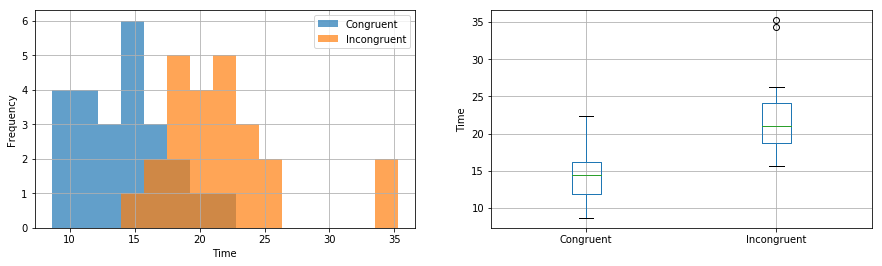

In [2]:
fig,axes = plt.subplots(1,2,figsize=(15,4))
df[['Congruent','Incongruent']].plot(kind='hist',bins=15,grid=True,ax = axes[0], alpha=0.7)
axes[0].set_xlabel('Time')
df[['Congruent','Incongruent']].plot(kind='box',grid=True,ax = axes[1])
axes[1].set_ylabel('Time');

From the left figure, we can see obviouse different of the average time used for two conditions. The time used in incongruent words condition is more than that of in congruent words condition. The right boxplot confirmed the observation.

(5)  Perform the statistical test and report your results.

In [3]:
diff_time = df['diff'].values
t,p = stats.ttest_1samp(diff_time,0)
print('t={:.4f},p={}'.format(t,p))

t=-8.0207,p=4.103000585711178e-08


In [4]:
dfree=len(df)-1
t_critical = 2.069
diff_mean = diff_time.mean()
diff_std = diff_time.std()
m = t_critical*diff_std/np.sqrt(len(df))
print('95% confidence interval of the time difference between two conditions is ({:.4f},{:.4f})'.format(diff_mean-m,diff_mean+m))

95% confidence interval of the time difference between two conditions is (-9.9761,-5.9535)


In [5]:
r_2 = t**2/(t**2+dfree)
r_2

0.73663641614450603

**Conclusion**:

1. $\alpha$ =0.05
2. Degree of freedom: 24-1=23
3. T critical value: -1.741

t=-8.0207  
p = 4.103000585711178e-08

The calculated t value is far less than the t-critical value and p is less $\alpha$. We reject H0, which means that the average time is significant differenct in two conditions.

Further more, the 95% confidence interval (df=23) is (-9.9761,-5.9535). Zero is not located in it, which also implies that the time used in two conditions are different. And the time of congruent condition is less than that of incongruent condition of 5.9535 to 9.9761 seconds (95% CI)

From caculate $r^2$, we could know that 74% of the time difference between two conditions is due to the difference of conditions. The randomness impact is trival. 